In [28]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [29]:
df = pd.read_csv(r"E:\Data Science by SRK\PROJECTS\other_data\Classification_project\cleaned_dataset_mental_health.csv")

In [30]:
df

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,4,1,3,3,1,1,0,0,1,0,0,1,1,1,3,3,4,0
1,4,1,4,3,0,1,0,0,0,0,0,0,0,0,4,2,5,1
2,3,2,3,3,1,0,0,0,1,1,0,1,1,0,6,5,7,2
3,4,1,4,2,1,1,1,0,1,0,0,0,0,0,3,2,2,0
4,4,3,3,3,0,0,0,0,0,0,0,1,1,1,5,5,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2,1,4,3,0,1,0,0,1,0,1,0,0,1,2,5,3,1
116,3,4,3,1,1,0,0,0,0,1,0,0,0,1,6,7,8,2
117,4,4,4,3,1,0,1,1,0,0,0,1,0,1,1,5,3,0
118,4,4,1,1,0,1,1,0,1,1,1,0,1,1,7,7,7,1


# X and y

In [31]:
X = df.drop(columns = ['Expert Diagnose'])
y = df['Expert Diagnose']

# Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = True)

# Modelling and evaluation

**Decision Tree classifier- with default hyperparameter**

In [33]:
# modeling
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(random_state = True)
dt_default.fit(X_train, y_train)

# Prediction
pred_train = dt_default.predict(X_train)
pred_test = dt_default.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy : ", accuracy_score(pred_train, y_train))
print("Test Accuracy : ", accuracy_score(pred_test, y_test))

from sklearn.model_selection import cross_val_score
print("cross_val_score : ", cross_val_score(dt_default, X, y, cv=5).mean())


Train Accuracy :  1.0
Test Accuracy :  0.75
cross_val_score :  0.75


# visualize Tree

In [34]:
X_train.columns.tolist()

['Sadness',
 'Euphoric',
 'Exhausted',
 'Sleep dissorder',
 'Mood Swing',
 'Suicidal thoughts',
 'Anorxia',
 'Authority Respect',
 'Try-Explanation',
 'Aggressive Response',
 'Ignore & Move-On',
 'Nervous Break-down',
 'Admit Mistakes',
 'Overthinking',
 'Sexual Activity',
 'Concentration',
 'Optimisim']

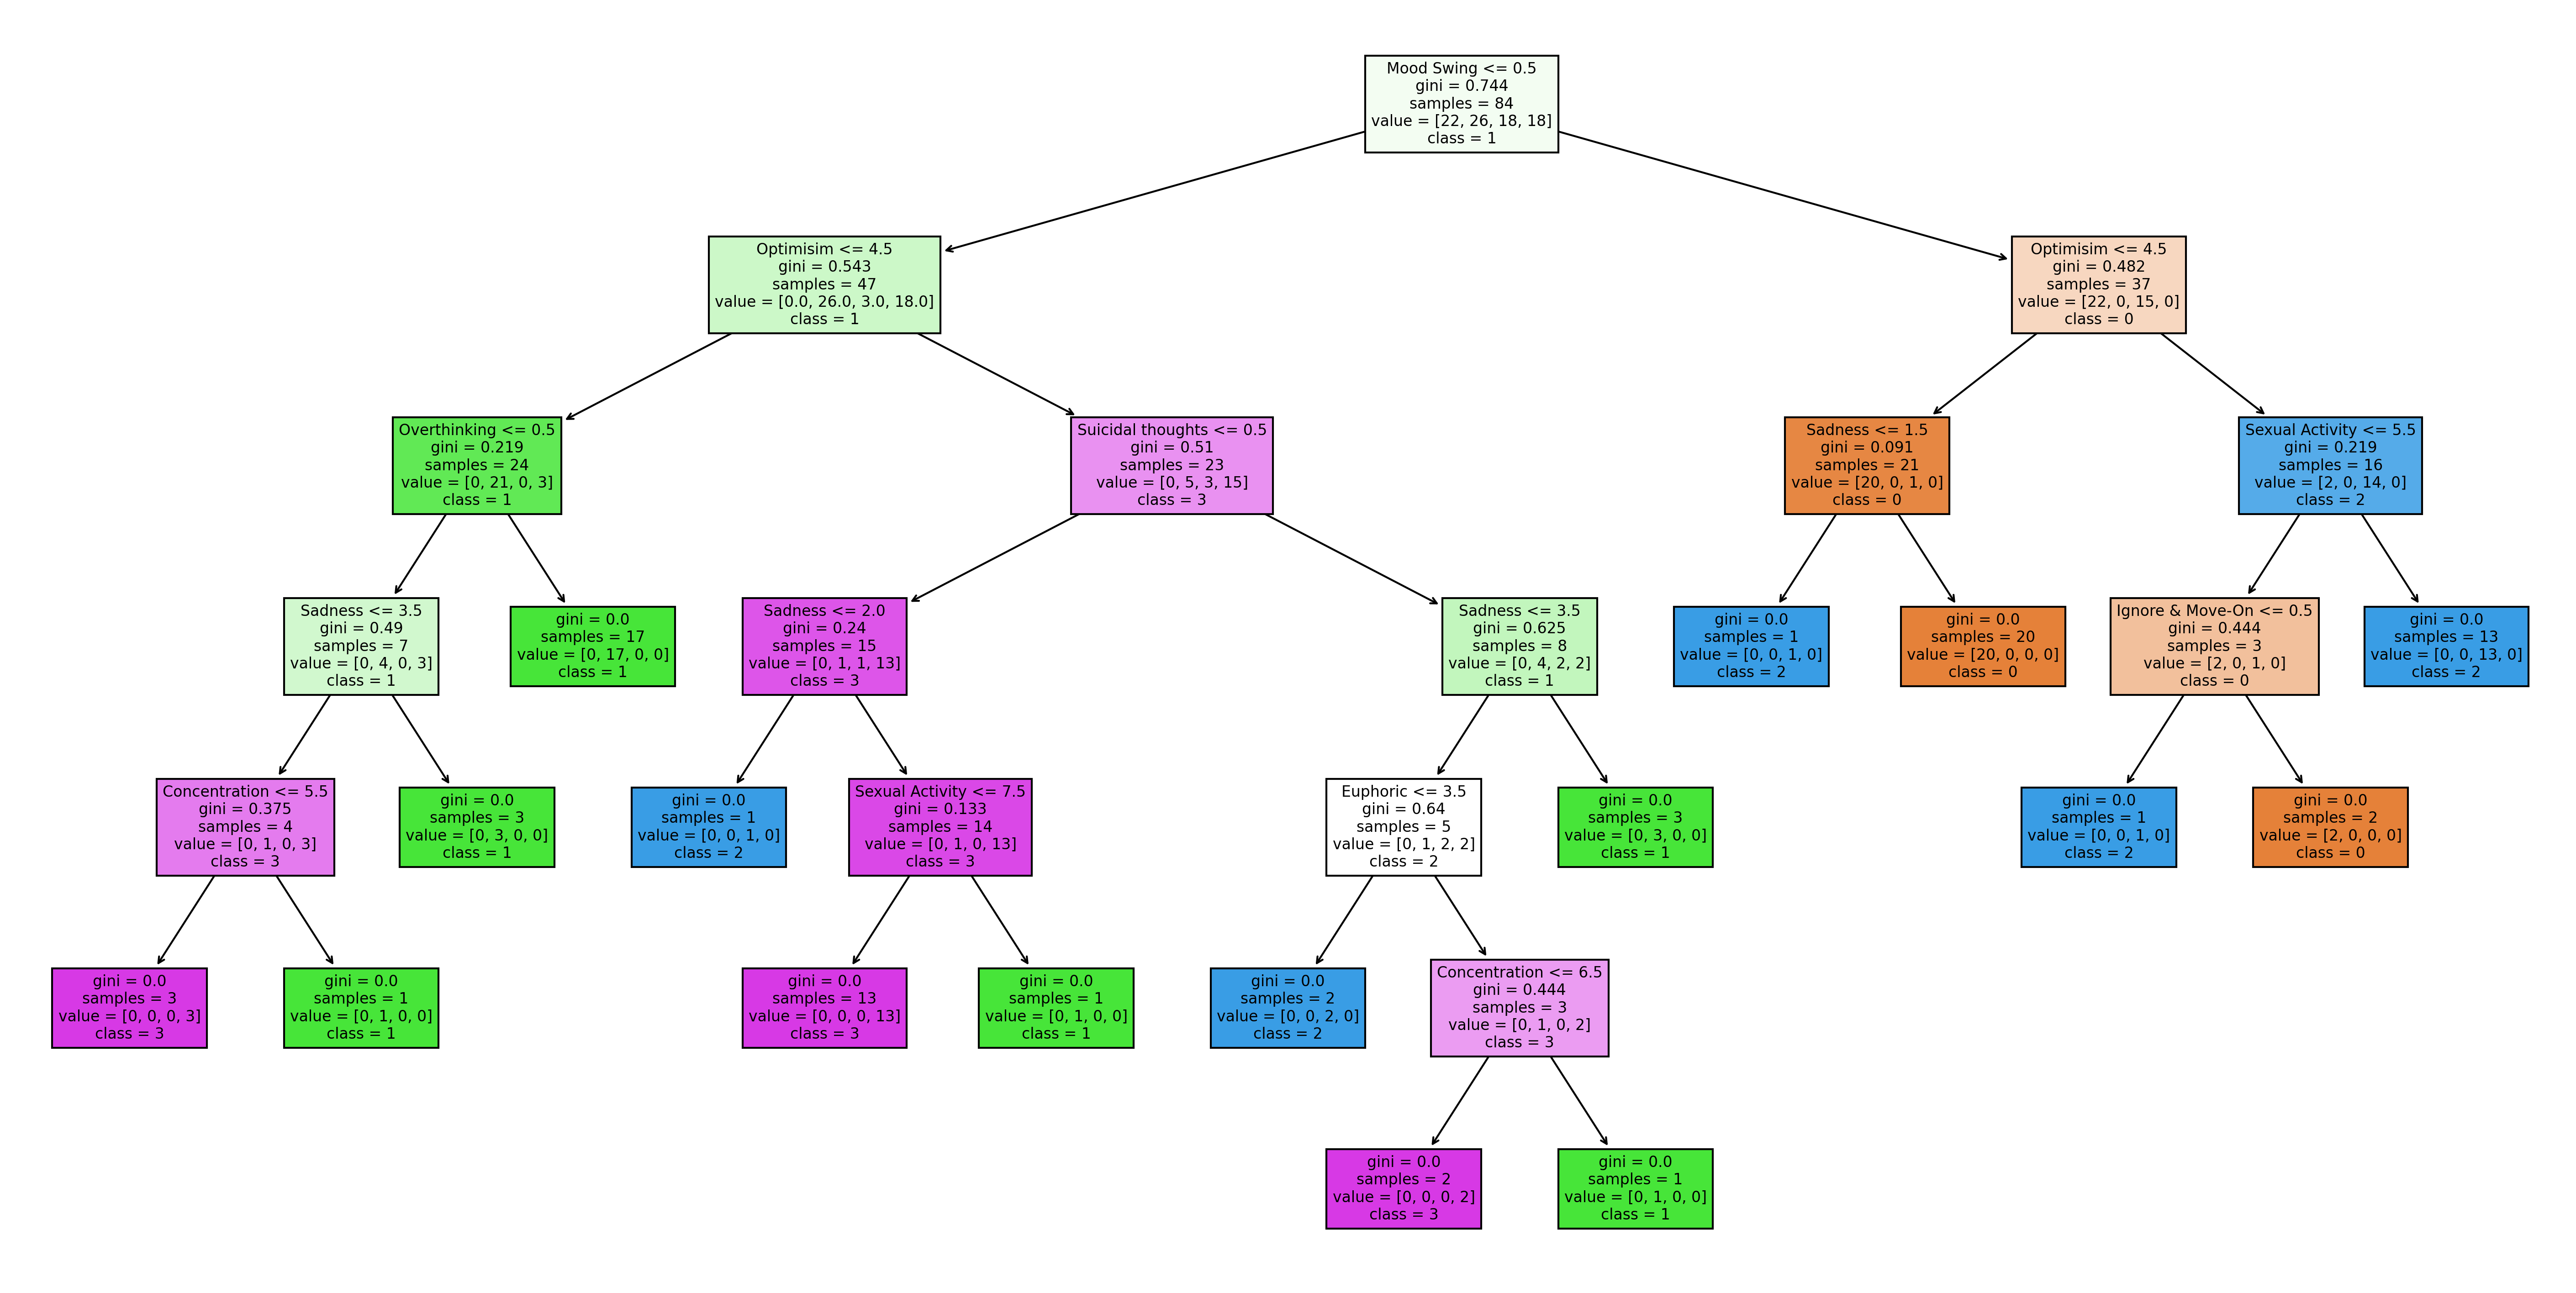

In [35]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,12), dpi = 300)

plot_tree(dt_default,
         filled = True,
         feature_names = X_train.columns.tolist(),
         class_names = ['0','1','2','3']
         )
plt.show()

In [36]:
print("Depth of the tree:", dt_default.get_depth())


Depth of the tree: 6


# HyperParameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV

# model
estimator = DecisionTreeClassifier(random_state = True)

# Parameters (which you want to tune and identify the best)
param_grid = {"criterion" : ['gini', 'entropy'], 
             'max_depth' : [1,2,3,4,5]}


grid = GridSearchCV(estimator, param_grid, scoring = 'accuracy', cv= 5)

grid.fit(X_train, y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [38]:
grid.best_estimator_.feature_importances_

array([0.       , 0.       , 0.       , 0.       , 0.4766802, 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.5233198])

In [39]:
feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                    index = X.columns,
                    columns = ['Feature Importance'])
feats_imp = feats[feats['Feature Importance'] > 0]
important_features_list = feats_imp.index.to_list()
important_features_list

['Mood Swing', 'Optimisim']

# Final Decision Tree model
**with best hyper parameters and imp_features**

In [40]:
# input with important features
X_imp = X[important_features_list]

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size = 0.2, random_state = True)

# Model with best hyperparameters
final_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = True)
final_dt_model.fit(X_train, y_train)

ypred_train = final_dt_model.predict(X_train)
ypred_test = final_dt_model.predict(X_test)

# Evaluation
print("Train Accuracy : ", accuracy_score(ypred_train, y_train))
print("Test Accuracy : ", accuracy_score(ypred_test, y_test))
print("Cross_val_score : ", cross_val_score(final_dt_model, X_imp, y, cv=5).mean())

Train Accuracy :  0.8229166666666666
Test Accuracy :  0.8333333333333334
Cross_val_score :  0.7916666666666667


In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, ypred_test)

array([[8, 0, 0, 0],
       [0, 2, 0, 0],
       [3, 0, 4, 0],
       [0, 1, 0, 6]], dtype=int64)